# Get data from a database and report statistics

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine, text

In [2]:
engine = create_engine("sqlite:///cities.db")

In [27]:
sql = text(
    """
    SELECT C.countryCode AS iso, C.isoAlpha3 AS iso3, C.countryName AS country_name, C.population AS country_population,
    C.areaInSqKm AS area, K.population AS city_population, K.lat, K.lng
    FROM city as K JOIN country AS C ON K.country_id = C.geonameId
    """
)

In [28]:
c = engine.connect()
df = pd.read_sql(sql=sql, con=c)
c.close()

In [29]:
df.head(2)

,iso,iso3,country_name,country_population,area,city_population,lat,lng
0,AD,AND,Andorra,77006,468.0,20430.0,42.507793,1.521091
1,AD,AND,Andorra,77006,468.0,11223.0,42.534742,1.580143


## Plot cities on map

In [8]:
plt.style.use('ggplot')

In [10]:
import geopandas

In [12]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


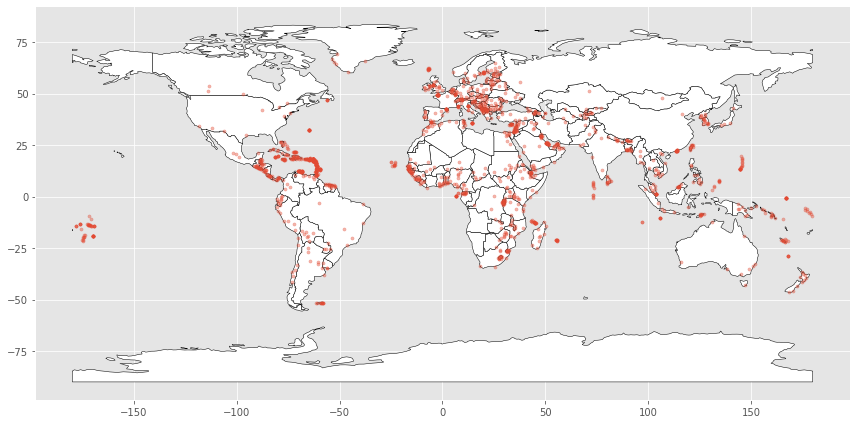

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(df.lng, df.lat, s=10, alpha=.4)
plt.tight_layout()
plt.show()

**Exercise**
Transform national code in color

In [30]:
import string 

In [60]:
pink = np.array([248/256, 24/256, 148/256, 1]) # Color example 